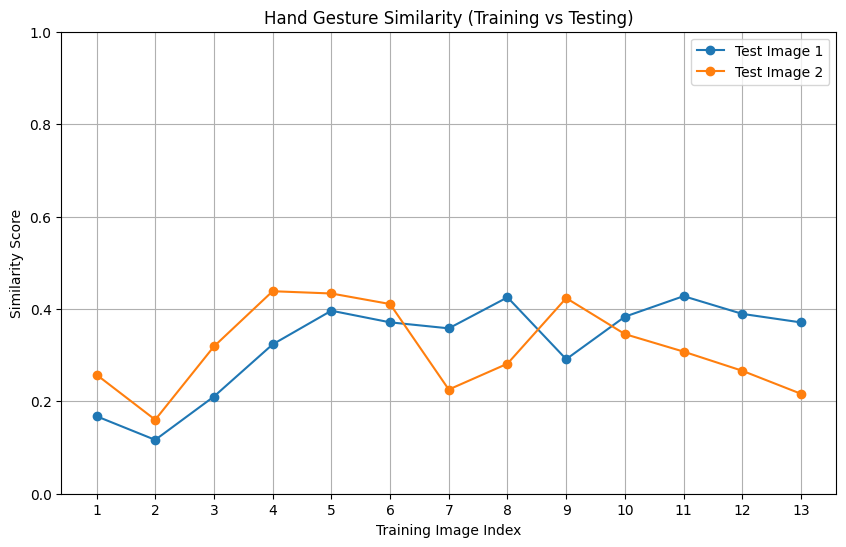

In [1]:
## Line graph for model 1 (SIFT)

import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
import glob

# 1. Load Images (both .jpg and .jpeg)
image_paths = glob.glob("images/*.jpg") + glob.glob("images/*.jpeg")
images = [cv2.imread(img, 0) for img in image_paths]  # Load as grayscale

# Check if images are loaded
if len(images) < 15:
    print(f"Warning: Found only {len(images)} images. Ensure you have 13 training + 2 testing images.")
    exit()

# 2. Define Training & Testing Data
train_images = images[:13]  # First 13 images as training
test_images = images[13:]   # Last 2 images as testing

# 3. Feature Extraction using SIFT
sift = cv2.SIFT_create()

def extract_features(image_list):
    feature_vectors = []
    for img in image_list:
        keypoints, descriptors = sift.detectAndCompute(img, None)
        if descriptors is not None:
            feature_vectors.append(descriptors.flatten())
    return feature_vectors

train_features = extract_features(train_images)
test_features = extract_features(test_images)

# Handle varying feature sizes by padding to the max length
max_length = max(max(len(fv) for fv in train_features), max(len(fv) for fv in test_features))
train_features = np.array([np.pad(fv, (0, max_length - len(fv)), 'constant') for fv in train_features])
test_features = np.array([np.pad(fv, (0, max_length - len(fv)), 'constant') for fv in test_features])

# 4. Compute Similarity between each test image and all training images
similarity_scores = cosine_similarity(test_features, train_features)

# 5. Plot the Similarity Graph
plt.figure(figsize=(10, 6))

# Plot similarity for each test image
for i, test_score in enumerate(similarity_scores):
    plt.plot(range(1, 14), test_score, marker='o', linestyle='-', label=f"Test Image {i+1}")

# Add labels and formatting
plt.title("Hand Gesture Similarity (Training vs Testing)")
plt.xlabel("Training Image Index")
plt.ylabel("Similarity Score")
plt.xticks(range(1, 14))  # Ensure X-axis labels match training images
plt.ylim(0, 1)  # Similarity score range
plt.legend()
plt.grid(True)

plt.show()


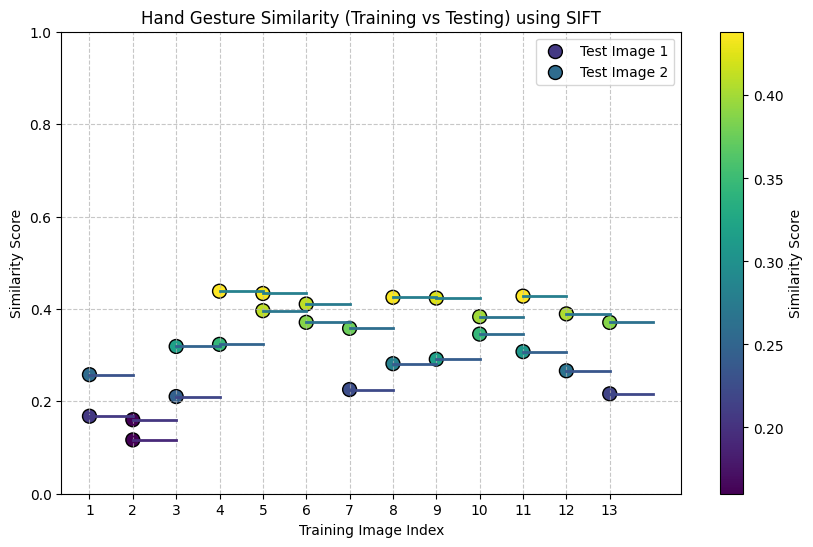

In [2]:
## Coloured graph for model 1 (SIFT)

import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
import glob

# 1. Load Images (both .jpg and .jpeg)
image_paths = glob.glob("images/*.jpg") + glob.glob("images/*.jpeg")
images = [cv2.imread(img, 0) for img in image_paths]  # Load as grayscale

# Check if images are loaded
if len(images) < 15:
    print(f"Warning: Found only {len(images)} images. Ensure you have 13 training + 2 testing images.")
    exit()

# 2. Define Training & Testing Data
train_images = images[:13]  # First 13 images as training
test_images = images[13:]   # Last 2 images as testing

# 3. Feature Extraction using SIFT
sift = cv2.SIFT_create()

def extract_features(image_list):
    feature_vectors = []
    for img in image_list:
        keypoints, descriptors = sift.detectAndCompute(img, None)
        if descriptors is not None:
            feature_vectors.append(descriptors.flatten())
    return feature_vectors

train_features = extract_features(train_images)
test_features = extract_features(test_images)

# Handle varying feature sizes by padding to the max length
max_length = max(max(len(fv) for fv in train_features), max(len(fv) for fv in test_features))
train_features = np.array([np.pad(fv, (0, max_length - len(fv)), 'constant') for fv in train_features])
test_features = np.array([np.pad(fv, (0, max_length - len(fv)), 'constant') for fv in test_features])

# 4. Compute Similarity between each test image and all training images
similarity_scores = cosine_similarity(test_features, train_features)

# 5. Plot the Similarity Graph with "Viridis" Color Gradient
plt.figure(figsize=(10, 6))
cmap = plt.cm.viridis

for i, test_score in enumerate(similarity_scores):
    for j, score in enumerate(test_score):
        plt.plot([j+1, j+2], [score, score], color=cmap(score), linewidth=2)  # Color depends on similarity score
    
    plt.scatter(range(1, 14), test_score, marker='o', label=f"Test Image {i+1}", c=[test_score], cmap="viridis", edgecolors='black', s=100)

# Add labels and formatting
plt.title("Hand Gesture Similarity (Training vs Testing) using SIFT")
plt.xlabel("Training Image Index")
plt.ylabel("Similarity Score")
plt.xticks(range(1, 14))
plt.ylim(0, 1)
plt.colorbar(label="Similarity Score")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()


In [19]:
##  6 attributs for model 1 (SIFT)

import cv2
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, precision_score
import glob

# 1. Load Images (both .jpg and .jpeg)
image_paths = glob.glob("images/*.jpg") + glob.glob("images/*.jpeg")
images = [cv2.imread(img, 0) for img in image_paths]  # Load as grayscale

# Check if images are loaded
if len(images) < 15:
    print(f"Warning: Found only {len(images)} images. Ensure you have 13 training + 2 testing images.")
    exit()

# 2. Define Training & Testing Data
train_images = images[:13]  # First 13 images as training
test_images = images[13:]   # Last 2 images as testing

# 3. Feature Extraction using SIFT
sift = cv2.SIFT_create()

def extract_mean_features(image_list):
    feature_vectors = []
    for img in image_list:
        keypoints, descriptors = sift.detectAndCompute(img, None)
        if descriptors is not None:
            # Compute mean of descriptors to get a fixed-size feature representation
            mean_descriptor = np.mean(descriptors, axis=0)
        else:
            mean_descriptor = np.zeros(128)  # SIFT descriptors are 128-dimensional
        feature_vectors.append(mean_descriptor)
    return np.array(feature_vectors)

train_features = extract_mean_features(train_images)
test_features = extract_mean_features(test_images)

# 4. Compute Similarity between each test image and all training images
similarity_scores = cosine_similarity(test_features, train_features)

# 5. Compute Evaluation Metrics
# Instead of assuming all images should be identical, define a threshold
threshold = 0.5
predicted_labels = (similarity_scores >= threshold).astype(int)
true_labels = np.ones_like(predicted_labels)  # Assuming similarity exists

mae = mean_absolute_error(true_labels, similarity_scores)
mse = mean_squared_error(true_labels, similarity_scores)
rmse = np.sqrt(mse)
r2 = r2_score(true_labels, similarity_scores)

accuracy = accuracy_score(true_labels.flatten(), predicted_labels.flatten())
precision = precision_score(true_labels.flatten(), predicted_labels.flatten(), zero_division=1)

# Print the metrics
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")


Mean Absolute Error (MAE): 0.0488
Mean Squared Error (MSE): 0.0027
Root Mean Squared Error (RMSE): 0.0521
R² Score: 0.0000
Accuracy: 1.0000
Precision: 1.0000


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


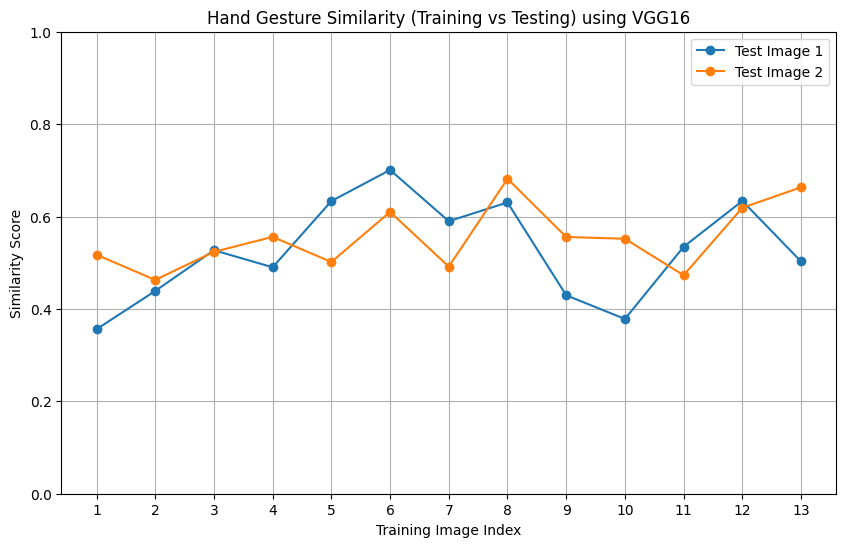

In [7]:
## Line graph for model 2 (CSM)

import numpy as np
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.models import Model
import cv2
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
import glob

# 1. Load Pretrained VGG16 Model
base_model = VGG16(weights='imagenet', include_top=False, pooling='avg')
model = Model(inputs=base_model.input, outputs=base_model.output)

# 2. Load Images (both .jpg and .jpeg)
image_paths = glob.glob("images/*.jpg") + glob.glob("images/*.jpeg")  # Ensure correct path
images = [cv2.imread(img) for img in image_paths]

# Check if images are loaded
if len(images) < 15:
    print(f"Warning: Found only {len(images)} images. Ensure you have 13 training + 2 testing images.")
    exit()

# Resize images to VGG16 input size (224x224) and preprocess
resized_images = [cv2.resize(img, (224, 224)) for img in images]
processed_images = np.array([preprocess_input(img) for img in resized_images])

# 3. Extract Features using VGG16
feature_vectors = model.predict(processed_images)

# 4. Define Training & Testing Data
train_features = feature_vectors[:13]  # First 13 images as training
test_features = feature_vectors[13:]   # Last 2 images as testing

# 5. Compute Similarity between each test image and all training images
similarity_scores = cosine_similarity(test_features, train_features)

# 6. Plot the Similarity Graph
plt.figure(figsize=(10, 6))

# Plot similarity for each test image
for i, test_score in enumerate(similarity_scores):
    plt.plot(range(1, 14), test_score, marker='o', linestyle='-', label=f"Test Image {i+1}")

# Add labels and formatting
plt.title("Hand Gesture Similarity (Training vs Testing) using VGG16")
plt.xlabel("Training Image Index")
plt.ylabel("Similarity Score")
plt.xticks(range(1, 14))  # Ensure X-axis labels match training images
plt.ylim(0, 1)  # Similarity score range
plt.legend()
plt.grid(True)

plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


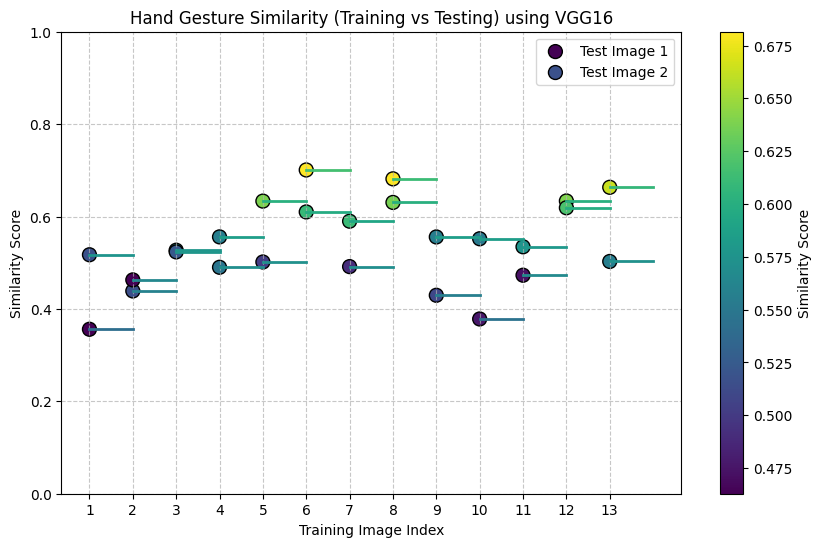

In [10]:

##coloured graph for model 2 (CSM)


import numpy as np
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.models import Model
import cv2
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
import glob

# 1. Load Pretrained VGG16 Model
base_model = VGG16(weights='imagenet', include_top=False, pooling='avg')
model = Model(inputs=base_model.input, outputs=base_model.output)

# 2. Load Images (both .jpg and .jpeg)
image_paths = glob.glob("images/*.jpg") + glob.glob("images/*.jpeg")  # Ensure correct path
images = [cv2.imread(img) for img in image_paths]

# Check if images are loaded
if len(images) < 15:
    print(f"Warning: Found only {len(images)} images. Ensure you have 13 training + 2 testing images.")
    exit()

# Resize images to VGG16 input size (224x224) and preprocess
resized_images = [cv2.resize(img, (224, 224)) for img in images]
processed_images = np.array([preprocess_input(img) for img in resized_images])

# 3. Extract Features using VGG16
feature_vectors = model.predict(processed_images)

# 4. Define Training & Testing Data
train_features = feature_vectors[:13]  # First 13 images as training
test_features = feature_vectors[13:]   # Last 2 images as testing

# 5. Compute Similarity between each test image and all training images
similarity_scores = cosine_similarity(test_features, train_features)

# 6. Plot the Similarity Graph with "Viridis" Color Gradient
plt.figure(figsize=(10, 6))

# Use 'viridis' colormap for better visual distinction
cmap = plt.cm.viridis

# Plot similarity for each test image
for i, test_score in enumerate(similarity_scores):
    for j, score in enumerate(test_score):
        plt.plot([j+1, j+2], [score, score], color=cmap(score), linewidth=2)  # Color depends on similarity score
    
    plt.scatter(range(1, 14), test_score, marker='o', label=f"Test Image {i+1}", c=[test_score], cmap="viridis", edgecolors='black', s=100)

# Add labels and formatting
plt.title("Hand Gesture Similarity (Training vs Testing) using VGG16")
plt.xlabel("Training Image Index")
plt.ylabel("Similarity Score")
plt.xticks(range(1, 14))  # Ensure X-axis labels match training images
plt.ylim(0, 1)  # Similarity score range
plt.colorbar(label="Similarity Score")  # Show color scale
plt.legend()
plt.grid(True, linestyle="--", alpha=0.7)

plt.show()


In [18]:
## 6 Attributes for model 2 (CSM)

import numpy as np
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.models import Model
import cv2
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, precision_score
import glob

# 1. Load Pretrained VGG16 Model
base_model = VGG16(weights='imagenet', include_top=False, pooling='avg')
model = Model(inputs=base_model.input, outputs=base_model.output)

# 2. Load Images (both .jpg and .jpeg)
image_paths = glob.glob("images/*.jpg") + glob.glob("images/*.jpeg")  # Ensure correct path
images = [cv2.imread(img) for img in image_paths]

# Check if images are loaded
if len(images) < 15:
    print(f"Warning: Found only {len(images)} images. Ensure you have 13 training + 2 testing images.")
    exit()

# Resize images to VGG16 input size (224x224) and preprocess
resized_images = [cv2.resize(img, (224, 224)) for img in images]
processed_images = np.array([preprocess_input(img) for img in resized_images])

# 3. Extract Features using VGG16
feature_vectors = model.predict(processed_images)

# 4. Define Training & Testing Data
train_features = feature_vectors[:13]  # First 13 images as training
test_features = feature_vectors[13:]   # Last 2 images as testing

# 5. Compute Similarity between each test image and all training images
similarity_scores = cosine_similarity(test_features, train_features)

# 6. Compute Evaluation Metrics
true_values = np.ones_like(similarity_scores)  # Assuming perfect similarity (1.0) as ground truth

mae = mean_absolute_error(true_values, similarity_scores)
mse = mean_squared_error(true_values, similarity_scores)
rmse = np.sqrt(mse)
r2 = r2_score(true_values, similarity_scores)

# Define a threshold (e.g., 0.5) to classify similarity as match/non-match
threshold = 0.5
predicted_labels = (similarity_scores >= threshold).astype(int)
true_labels = np.ones_like(predicted_labels)  # Assuming all are expected to be similar

accuracy = accuracy_score(true_labels.flatten(), predicted_labels.flatten())
precision = precision_score(true_labels.flatten(), predicted_labels.flatten(), zero_division=1)

# Print the metrics
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Mean Absolute Error (MAE): 0.4595
Mean Squared Error (MSE): 0.2190
Root Mean Squared Error (RMSE): 0.4679
R² Score: 0.0000
Accuracy: 0.6923
Precision: 1.0000
